# Introduction to Machine Learning

This first notebook works with the Breast Cancer Wisconsin (Diagnostic) Database. The goal is to create a classifier that can with the diagnosis of patients. 

## Import libraries and dataset

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt 

cancer = load_breast_cancer() # Loads the breast cancer dataset

print(cancer.DESCR) # Prints the dataset description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In order to figure out how many features the dataset has, a quick function was written.

In [10]:
def get_dataset_features():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    return len(cancer['feature_names'])

get_dataset_features()

30

The Scikit-learn library can work with lists, numpy arrays, scipy-sparse matrices, pandas DataFrames, so there is no need to convert the dataset into a dataframe. However, a conversion into a DataFrame makes certain data operations, such as data murging easier. Therefore, the following function will convert the dataset into a pandas DataFrame.

In [11]:
def convert_datatoframe():
    df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names) # This will create a data frame with the cancer data and features as columns
    df_cancer['target'] = pd.Series(cancer.target) # In order to get target as additional column we have to create a pandas series
    return df_cancer # Gives first rows of newly created DataFrame

convert_datatoframe().head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

As next step, it is interesting to know how the class distribution is in order to choose an accurate evualation metric.

In [12]:
def count_classes():
    cancer_df = convert_datatoframe() # Gets the data frame with the previous function
    cancer_ser = cancerdf['target'].value_counts() # Creates a series which counts the number of 0 and 1s
    cancer_ser.rename(index = {1: 'benign', 0: 'malignant'}, inplace=True) # Changes the naming of the index
    return cancer_ser

count_classes()

benign       357
malignant    212
Name: target, dtype: int64

In order to have a ML application, there is the need to split the dataset into features and labels. 

This function should return a tuple with featues and labels! 

In [14]:
def split_xy():
    cancer_df = convert_datatoframe()
    X = cancer_df.iloc[:,:30] # Creates a dataframe based on cancerdf, but without last column of target
    y = cancer_df.iloc[:,30] # Creates a dataframe based on cancerdf, but only the last column targetp
    return X,y

split_xy()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      475.9          0.11860   
 10        16.020         23.24          102.70      797.8          0.08206   
 11        15.780         17.89          103.60     

Now, it is time for the split between training and testing data. The  `train_test_split` methods, splits `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Furthermore, there is the need to set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!**

*This function will gives a tuple of length 4 with :* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(426, 30)`
* `X_test` *has shape* `(143, 30)`
* `y_train` *has shape* `(426,)`
* `y_test` *has shape* `(143,)`

In [15]:
def split_traintest():
    from sklearn.model_selection import train_test_split
    X, y = split_xy() # Calls the 2 data frames of the previous task
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # Creates four data sets with training and test data
    return (X_train, X_test, y_train, y_test)

split_traintest()
    

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 293       11.850         17.46           75.54      432.7          0.08372   
 332       11.220         19.86           71.94      387.3          0.10540   
 565       20.130         28.25          131.20     1261.0          0.09780   
 278       13.590         17.84           86.24      572.3          0.07948   
 489       16.690         20.20          107.10      857.6          0.07497   
 346       12.060         18.90           76.66      445.3          0.08386   
 357       13.870         16.21           88.52      593.7          0.08743   
 355       12.560         19.07           81.92      485.8          0.08760   
 112       14.260         19.65           97.83      629.9          0.07837   
 68         9.029         17.33           58.79      250.5          0.10660   
 526       13.460         18.75           87.44      551.1          0.10750   
 206        9.876         17.27           62.92     

## KNN Neighbour Classifier

By using a KNeighborsClassifier, we first will fit the k-nearest neighbors (knn) classifier with `X_train`, `y_train`. In a first example, we will be  using one nearest neighbor (`n_neighbors = 1`).

In [21]:
def knn_one():
    from sklearn.neighbors import KNeighborsClassifier
    X_train, X_test, y_train, y_test = split_traintest()
    
    knn = KNeighborsClassifier(n_neighbors = 1) # Creates a KNN classifier instance
    knn.fit(X_train, y_train) # Fits the KNN classifier with the chosen training data
    
    return knn

knn_one()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Prediction

Now, using then KNN classifier, we predict the class labels using the mean value for each feature.

In order to implement this, we will use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the label column, and finally reshapes the data from 1 dimension to 2.

In [22]:
def predict_knn_one_mean():
    cancer_df = convert_datatoframe() 
    means = cancer_df.mean()[:-1].values.reshape(1, -1)
    
    knn_clf = knn_one()
    cancer_predict = knn_clf.predict(means)
    
    return cancer_predict 

predict_knn_one_mean()

array([1])

This time, the KNN classifier will be applied on the test set, predicting the class labels for all samples.

In [23]:
def predict_knn_one():
    X_train, X_test, y_train, y_test = split_traintest()
    knn_clf = knn_one()
    
    # Your code here
    cancer_predict = knn_clf.predict(X_test) # will input all the X_test training data in the classifier
    return cancer_predict

predict_knn_one()


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Evaluate The Prediction With Accuracy

In order to evalute the performance of the classifier, the score (mean accuracy) of the KNN classifier will be computed for  `X_test` and `y_test`.


In [24]:
def eval_knn_acc():
    X_train, X_test, y_train, y_test = split_traintest()
    knn_clf = knn_one()
    
    knn_accu = knn_clf.score(X_test, y_test)
    return knn_accu

eval_knn_acc()

0.916083916083916

### Visualising The Performance

/Users/vincentvonburen/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


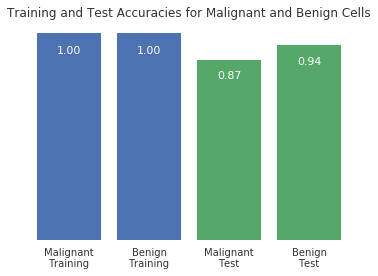

In [29]:
def accuracy_plot():

    X_train, X_test, y_train, y_test = split_traintest()

    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = knn_one()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
    
accuracy_plot()